# 2022 BRFSS Survey Data and Documentation dataset

The 2022 BRFSS Survey Data and Documentation dataset is a telephone survey by the CDD that collects risk factors concerning diabetes.  It contains 445k surveys with 326 features.

https://www.cdc.gov/brfss/annual_data/annual_2022.html

Data codebook : https://www.cdc.gov/brfss/annual_data/2022/zip/codebook22_llcp-v2-508.zip

Data dictionary from: https://www.cdc.gov/brfss/annual_data/2022/files/LLCP2022XPT.zip

The Behavioral Risk Factor Surveillance System (BRFSS) is a collaborative project between all the states
in the United States and participating US territories and the Centers for Disease Control and Prevention
(CDC). The BRFSS is administered and supported by CDC's Population Health Surveillance Branch, under
the Division of Population Health at CDC’s National Center for Chronic Disease Prevention and Health
Promotion. The BRFSS is a system of ongoing health-related telephone surveys that collect data on
health-related risk behaviors, chronic health conditions, health-care access, and use of preventive
services from the noninstitutionalized adult population (≥ 18 years) residing in the United States and
participating areas.

This the original dataset contained 6 labels for Diabetes, these were grouped into 3 No Diabetes, Pre-Diabetes, and Diabetes.

The 445k original data was cleaned to 324k of data.

<i>What kind of cleaning steps did you perform?</i>
* Identify the features that would be useful.
* Reformat the identifiers to be sequential.
* Create new categories based on the input data.
* Convert the data to the new categories.
* Drop or convert null/empty/missing data based on the feature.

<i>How did you deal with missing values, if any?</i><br />
I made new categories, if the missing data fit into a new category it was moved.<br />
In some cases the mean was used if missing data wasn't available, depending on the data.<br />
Finally data was dropped if it didn't fit or wasn't suitable for conversion.
<br /><br />
<i>Were there outliers? If so, how did you handle them?</i><br />
Most of the numerical data was already in some type of bucket.<br />
<br />
<i>If your dataset is too large to work with, does it make sense to build your prototype on a smaller subset of the data?</i><br />
Although I didn't reduce the data, if the data was too large a smaller subset work to build a prototype.

# Import the library

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the Dataset
Load and review the raw data.  The data is storedin Statistical Analysis Software (SAS) file format.<br />
It contains 445k surveys with 326 features.


In [65]:
raw_df = pd.read_sas(r"LLCP2022.XPT.zip")

In [66]:
print(raw_df.shape)
raw_df.head(5)

(445132, 326)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_SMOKGRP,_LCSREC,DRNKANY6,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4
0,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000001',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,1.0,2.0,2.0
1,1.0,1.0,b'02042022',b'02',b'04',b'2022',1100.0,b'2022000002',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0
2,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000003',2.022000e+09,1.0,...,4.0,NaN,2.0,5.397605e-79,1.0,5.397605e-79,1.0,NaN,NaN,2.0
3,1.0,1.0,b'02032022',b'02',b'03',b'2022',1100.0,b'2022000004',2.022000e+09,1.0,...,3.0,2.0,2.0,5.397605e-79,1.0,5.397605e-79,1.0,9.0,9.0,2.0
4,1.0,1.0,b'02022022',b'02',b'02',b'2022',1100.0,b'2022000005',2.022000e+09,1.0,...,4.0,NaN,1.0,1.000000e+01,1.0,1.400000e+02,1.0,NaN,NaN,2.0


# Feature Selection and preprocess

Selecting relevant features to report on.  Feature selection is based on a selection of features from an older dataset from 2015 https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset/data plus some additional features that are made available from the 2022 survey.

In [67]:
df = pd.DataFrame()

## Preprocess Diabetes
Diabetes detection is the target feature that will be used in the prediction and analysis.

In [68]:
df['diabetes'] = raw_df.DIABETE4
# 1	Yes
# 2	Yes, but female told only during pregnancy
# 3	No
# 4	No, pre-diabetes or borderline diabetes
# 7	Don’t know/Not Sure
# 9	Refused
# BLANK	Not asked or Missing

df.loc[df.diabetes.isin([1,2,4]), "diabetes"] = "Yes"
df.loc[df.diabetes.isin([3]), "diabetes"] = "No"

#Remove 7 Don't know/Not Sure and 9 Refused
df.drop(df[df.diabetes.isin([7,9])].index, inplace=True)

#Remove NA
df.drop(df[df.diabetes.isna()].index, inplace=True)

#### Preprocess Completed Survey

In [69]:
#SetDataFrameValue is a helper fuction that replaces an old value in a dataframe with a new value in a dataframe.
def SetDataFrameValue(ColumnName, Old, New, Df=df):
    Df.loc[Df[ColumnName] == Old, ColumnName] = New  
    
#PreprocessValidation - Used to validate a feature was crossreferenced properly.
def PreprocessValidation(ColumName, Sort=None, Df=df,):
    if isinstance(Sort, list):
        return pd.DataFrame(Df[ColumName].value_counts()[Sort]) 
    else:
        return pd.DataFrame(Df[ColumName].value_counts()) 

### Completed Survey 

Whether all survey tree questions were answered or if the survey taker quit early.

In [70]:
key = 'completed_survey'
completed_survey_sort = ['Partial','Completed']

df[key] = raw_df.DISPCODE

SetDataFrameValue(key, 1100, "Completed")
SetDataFrameValue(key, 1200, "Partial")

#Validate
PreprocessValidation(key, Sort=completed_survey_sort)

,count
completed_survey,
Partial,91573
Completed,352472


### Initial feature selection
A new dataframe df is set with the survey data and assigned one of the datasets from the survey, the data is cross referenced and then validated.

In [71]:
key = 'bmi'
bmi_sort = ['Under','Normal','Overweight',"Obese"]

df[key] = raw_df._BMI5CAT
# 1	Underweight
# 2	Normal Weight
# 3	Overweight
# 4	Obese
# BLANK	Don’t know/Refused/Missing

SetDataFrameValue(key, 1, "Under")
SetDataFrameValue(key, 2, "Normal")
SetDataFrameValue(key, 3, "Overweight")
SetDataFrameValue(key, 4, "Obese")

#Validate
PreprocessValidation(key, Sort=bmi_sort)

,count
bmi,
Under,6757
Normal,116798
Overweight,139770
Obese,132299


In [72]:
key = 'smoker'
smoker_sort = ['Current','Former','Some',"No"]

df[key] = raw_df._SMOKGRP
# 1	Current smoker, 20+ Pack Years
# 2	Former smoker, 20+ Pack Years, quit < 15 years
# 3	All other current and former smokers
# 4	Never smoker
# BLANK	Don’t know/Refused/Missing

SetDataFrameValue(key, 1, "Current")
SetDataFrameValue(key, 2, "Former")
SetDataFrameValue(key, 3, "Some")
SetDataFrameValue(key, 4, "No")

#Validate
PreprocessValidation(key, Sort=smoker_sort)

,count
smoker,
Current,22556
Former,13802
Some,127011
No,245488


In [73]:
key = 'stroke'
stroke_sort = ['Yes','No','Unsure','Refused']
df[key] = raw_df.CVDSTRK3
# 1	Yes
# 2	No
# 7	Don’t know/Not sure
# 9	Refused
# BLANK	Not asked or Missing

SetDataFrameValue(key, 1, "Yes")
SetDataFrameValue(key, 2, "No")
SetDataFrameValue(key, 7, "Unsure")
SetDataFrameValue(key, 9, "Refused")

#Validate
PreprocessValidation(key, stroke_sort)

,count
stroke,
Yes,19187
No,423576
Unsure,1221
Refused,61


In [74]:
key = 'heart_attack'
heart_attack_sort = ['Yes', 'No', 'Unsure', 'Refused']

df[key] = raw_df.CVDINFR4
# 1	Yes	
# 2	No
# 7	Don’t know/Not sure	
# 9	Refused	
# BLANK	Not asked or Missing

SetDataFrameValue(key, 1, "Yes")
SetDataFrameValue(key, 2, "No")
SetDataFrameValue(key, 7, "Unsure")
SetDataFrameValue(key, 9, "Refused")

#Validate
PreprocessValidation(key, heart_attack_sort)

,count
heart_attack,
Yes,25031
No,416223
Unsure,2657
Refused,132


In [75]:
key = 'angina_or_chd'
angina_or_chd_sort = ['Yes', 'No', 'Unsure', 'Refused']

df[key] = raw_df.CVDCRHD4
# 1	Yes
# 2	No
# 7	Don’t know/Not sure
# 9	Refused
# BLANK	Not asked or Missing

SetDataFrameValue(key, 1, "Yes")
SetDataFrameValue(key, 2, "No")
SetDataFrameValue(key, 7, "Unsure")
SetDataFrameValue(key, 9, "Refused")

#Validate
PreprocessValidation(key, angina_or_chd_sort)

,count
angina_or_chd,
Yes,26498
No,413445
Unsure,3958
Refused,144


In [76]:
key = 'chd_mi'
chd_mi_sort = ['Yes', 'No']

df[key] = raw_df._MICHD
# 1	Reported having MI or CHD
# 2	Did not report having MI or CHD
# BLANK	Not asked or Missing.

SetDataFrameValue(key, 1, "Yes")
SetDataFrameValue(key, 2, "No")

#Validate
PreprocessValidation(key, chd_mi_sort)

,count
chd_mi,
Yes,39649
No,399686


In [77]:
key = 'asthma'
asthma_sort = ["Current", "Former", "Never", "Don't know"]

df[key] = raw_df._ASTHMS1
# 1	Current
# 2	Former
# 3	Never
# 9	Don’t know/Not Sure Or Refused/Missing
# Notes: ASTHMA3 = 7 or 9 or Missing or ASTHNOW = 7 or 9 or Missing

SetDataFrameValue(key, 1, "Current")
SetDataFrameValue(key, 2, "Former")
SetDataFrameValue(key, 3, "Never")
SetDataFrameValue(key, 9, "Don't know")

#Validate
PreprocessValidation(key, asthma_sort)

,count
asthma,
Current,45561
Former,18914
Never,376009
Don't know,3561


In [78]:
key = 'physical_activity'
physical_activity_sort = ["Yes", "No", "Don't know"]

df[key] = raw_df._TOTINDA
# 1	Had physical activity or exercise
# 2	No physical activity or exercise in last 30 days
# 9	Don’t know/Refused/Missing

SetDataFrameValue(key, 1, "Yes")
SetDataFrameValue(key, 2, "No")
SetDataFrameValue(key, 9, "Don't know")

#Validate
PreprocessValidation(key, physical_activity_sort)

,count
physical_activity,
Yes,336878
No,106170
Don't know,997


In [79]:
key = 'heavy_drinking'
heavy_drinking_sort = ["Yes", "No", "Don't know"]

df[key] = raw_df._RFDRHV8
# 1	No
# 2	Yes
# 9	Don’t know/Refused/Missing

SetDataFrameValue(key, 1, "Yes")
SetDataFrameValue(key, 2, "No")
SetDataFrameValue(key, 9, "Don't know")

#Validate
PreprocessValidation(key, heavy_drinking_sort)

,count
heavy_drinking,
Yes,368428
No,26247
Don't know,49370


In [80]:
key = 'no_doctor_due_to_cost'
no_doctor_due_to_cost_sort = ["Yes", "No", "Unsure", "Refused"]

df[key] = raw_df.MEDCOST1
# 1	Yes
# 2	No
# 7	Don’t know/Not sure
# 9	Refused
# BLANK	Not asked or Missing

SetDataFrameValue(key, 1, "Yes")
SetDataFrameValue(key, 2, "No")
SetDataFrameValue(key, 7, "Unsure")
SetDataFrameValue(key, 9, "Refused")

#Validate
PreprocessValidation(key)

,count
no_doctor_due_to_cost,
No,405503
Yes,37027
Unsure,1143
Refused,370


In [81]:
key = 'any_healthcare_insurance'
any_healthcare_insurance_sort = ["Employer", "Private", "Medicare", "Medigap", "Medicaid", "CHIP", "Military", "Indian", "State", "Other", "No", "Unsure", "Refused"]

df[key] = raw_df.PRIMINSR
# 1	A plan purchased through an employer or union (including plans purchased through another person´s employer)
# 2	A private nongovernmental plan that you or another family member buys on your own
# 3	Medicare
# 4	Medigap
# 5	Medicaid
# 6	Children´s Health Insurance Program (CHIP)
# 7	Military related health care: TRICARE (CHAMPUS) / VA health care / CHAMP- VA
# 8	Indian Health Service
# 9	State sponsored health plan
# 10 Other government program
# 88 No coverage of any type
# 77 Don’t know/Not Sure
# 99 Refused
# BLANK	Not asked or Missing

SetDataFrameValue(key, 1, "Employer")
SetDataFrameValue(key, 2, "Private")
SetDataFrameValue(key, 3, "Medicare")
SetDataFrameValue(key, 4, "Medigap")
SetDataFrameValue(key, 5, "Medicaid")
SetDataFrameValue(key, 6, "CHIP")
SetDataFrameValue(key, 7, "Military")
SetDataFrameValue(key, 8, "Indian")
SetDataFrameValue(key, 9, "State")
SetDataFrameValue(key, 10, "Other")
SetDataFrameValue(key, 88, "No")
SetDataFrameValue(key, 77, "Unsure")
SetDataFrameValue(key, 99, "Refused")

#Validate
PreprocessValidation(key, any_healthcare_insurance_sort)

,count
any_healthcare_insurance,
Employer,161190
Private,36848
Medicare,135587
Medigap,536
Medicaid,28972
CHIP,187
Military,15346
Indian,1380
State,12834


In [82]:
key = 'general_health_status'
general_health_status_sort = ["Excellent", "Very good", "Good", "Fair", "Poor", "Don’t know", "Refused"]

df[key] = raw_df.GENHLTH
# 1	Excellent
# 2	Very good
# 3	Good	
# 4	Fair
# 5	Poor
# 7	Don’t know/Not Sure
# 9	Refused
# BLANK	Not asked or Missing

SetDataFrameValue(key, 1, "Excellent")
SetDataFrameValue(key, 2, "Very good")
SetDataFrameValue(key, 3, "Good")
SetDataFrameValue(key, 4, "Fair")
SetDataFrameValue(key, 5, "Poor")
SetDataFrameValue(key, 7, "Don’t know")
SetDataFrameValue(key, 9, "Refused")

#Validate
PreprocessValidation(key, general_health_status_sort)

,count
general_health_status,
Excellent,71770
Very good,148227
Good,143225
Fair,60051
Poor,19637
Don’t know,799
Refused,335


In [83]:
key = 'mental_health_status'
mental_health_status_sort = ["0", "1-13", "14+", "Unknown"]

df[key] = raw_df._MENT14D
# 1	Zero days when mental health not good
# 2	1-13 days when mental health not good
# 3	14+ days when mental health not good
# 9	Don’t know/Refused/Missing

SetDataFrameValue(key, 1, "0")
SetDataFrameValue(key, 2, "1-13")
SetDataFrameValue(key, 3, "14+")
SetDataFrameValue(key, 9, "Unknown")

#Validate
PreprocessValidation(key, mental_health_status_sort)

,count
mental_health_status,
0,264695
1-13,110398
14+,60009
Unknown,8943


In [84]:
key = 'physical_health_status'
physical_health_status_sort = ["0", "1-13", "14+", "Unknown"]

df[key] = raw_df._PHYS14D
# 1	Zero days when physical health not good	
# 2	1-13 days when physical health not good
# 3	14+ days when physical health not good
# 9	Don’t know/Refused/Missing

SetDataFrameValue(key, 1, "0")
SetDataFrameValue(key, 2, "1-13")
SetDataFrameValue(key, 3, "14+")
SetDataFrameValue(key, 9, "Unknown")

#Validate
PreprocessValidation(key, physical_health_status_sort)

,count
physical_health_status,
0,267309
1-13,108064
14+,57889
Unknown,10783


In [85]:
key = 'difficulty_walking'
difficulty_walking_sort = ["Yes","No","Don’t know", "Refused"]

df[key] = raw_df.DIFFWALK
# 1	Yes	
# 2	No	
# 7	Don’t know/Not Sure
# 9	Refused	
# BLANK	Not asked or Missing

SetDataFrameValue(key, 1, "Yes")
SetDataFrameValue(key, 2, "No")
SetDataFrameValue(key, 7, "Don’t know")
SetDataFrameValue(key, 9, "Refused")

#Validate
PreprocessValidation(key, difficulty_walking_sort)

,count
difficulty_walking,
Yes,67861
No,352399
Don’t know,1209
Refused,498


In [86]:
key = 'gender'
gender_sort = ['Male','Female']

df[key] = raw_df._SEX
# 1	Male
# 2	Female

SetDataFrameValue(key, 1, "Male")
SetDataFrameValue(key, 2, "Female")

#Validate
PreprocessValidation(key, gender_sort)

,count
gender,
Male,208626
Female,235419


In [87]:
key = 'age'
age_sort = ["18 to 24", "25 to 29", "30 to 34", "35 to 39", "40 to 44", "45 to 49", "50 to 54", "55 to 59", "60 to 64", "65 to 69", "70 to 74", "75 to 79", "80 or older", "Don’t know"]

df[key] = raw_df._AGEG5YR
# 1	Age 18 to 24
# 2	Age 25 to 29
# 3	Age 30 to 34
# 4	Age 35 to 39
# 5	Age 40 to 44
# 6	Age 45 to 49
# 7	Age 50 to 54
# 8	Age 55 to 59
# 9	Age 60 to 64
# 10 Age 65 to 69
# 11 Age 70 to 74
# 12 Age 75 to 79
# 13 Age 80 or older
# 14 Don’t know/Refused/Missing

SetDataFrameValue(key, 1, "18 to 24")
SetDataFrameValue(key, 2, "25 to 29")
SetDataFrameValue(key, 3, "30 to 34")
SetDataFrameValue(key, 4, "35 to 39")
SetDataFrameValue(key, 5, "40 to 44")
SetDataFrameValue(key, 6, "45 to 49")
SetDataFrameValue(key, 7, "50 to 54")
SetDataFrameValue(key, 8, "55 to 59")
SetDataFrameValue(key, 9, "60 to 64")
SetDataFrameValue(key, 10, "65 to 69")
SetDataFrameValue(key, 11, "70 to 74")
SetDataFrameValue(key, 12, "75 to 79")
SetDataFrameValue(key, 13, "80 or older")
SetDataFrameValue(key, 14, "Don’t know")

#Validate
PreprocessValidation(key, age_sort)

,count
age,
18 to 24,26854
25 to 29,21946
30 to 34,25760
35 to 39,28474
40 to 44,29878
45 to 49,28476
50 to 54,33577
55 to 59,36761
60 to 64,44434


In [88]:
key = 'education'
education_sort = ["Middle School", "High School", "Some College", "Graduated College", "Not sure"]

df[key] = raw_df._EDUCAG
# 1	Did not graduate High School
# 2	Graduated High School
# 3	Attended College or Technical School
# 4	Graduated from College or Technical School
# 9	Don’t know/Not sure/Missing

SetDataFrameValue(key, 1, "Middle School")
SetDataFrameValue(key, 2, "High School")
SetDataFrameValue(key, 3, "Some College")
SetDataFrameValue(key, 4, "Graduated College")
SetDataFrameValue(key, 9, "Not sure")

#Validate
PreprocessValidation(key, education_sort)

,count
education,
Middle School,25870
High School,108731
Some College,120034
Graduated College,187204
Not sure,2206


In [89]:
key = 'income'
income_sort = ["< $15,000", "$15,000 to < $25,000", "$25,000 to < $35,000", "$35,000 to < $50,000", "$50,000 to < $100,000", "$100,000 to < $200,000", "> $200,000", "Don’t know"]

df[key] = raw_df._INCOMG1
# 1	Less than $15,000
# 2	$15,000 to < $25,000
# 3	$25,000 to < $35,000
# 4	$35,000 to < $50,000
# 5	$50,000 to < $100,000
# 6	$100,000 to < $200,000
# 7	$200,000 or more
# 9	Don’t know/Not sure/Missing

SetDataFrameValue(key, 1, "< $15,000")
SetDataFrameValue(key, 2, "$15,000 to < $25,000")
SetDataFrameValue(key, 3, "$25,000 to < $35,000")
SetDataFrameValue(key, 4, "$35,000 to < $50,000")
SetDataFrameValue(key, 5, "$50,000 to < $100,000")
SetDataFrameValue(key, 6, "$100,000 to < $200,000")
SetDataFrameValue(key, 7, "> $200,000")
SetDataFrameValue(key, 9, "Don’t know")

#Validate
PreprocessValidation(key, income_sort)

,count
income,
"< $15,000",21276
"$15,000 to < $25,000",34541
"$25,000 to < $35,000",42198
"$35,000 to < $50,000",46753
"$50,000 to < $100,000",107492
"$100,000 to < $200,000",72832
"> $200,000",23457
Don’t know,95496


In [90]:
key = 'race'
race_sort = ["White", "Black or African American", "American Indian or Alaskan Native", "Asian", "Native Hawaiian or other Pacific Islander", "Multiracial", "No race", "Don’t know", "Refused"]

df[key] = raw_df._PRACE2
# 1	White
# 2	Black or African American
# 3	American Indian or Alaskan Native
# 4	Asian
# 5	Native Hawaiian or other Pacific Islander
# 7	Multiracial but no preferred race
# 88	No race choice given
# 77	Don’t know/Not sure
# 99	Refused
# BLANK	Missing

SetDataFrameValue(key, 1, "White")
SetDataFrameValue(key, 2, "Black or African American")
SetDataFrameValue(key, 3, "American Indian or Alaskan Native")
SetDataFrameValue(key, 4, "Asian")
SetDataFrameValue(key, 5, "Native Hawaiian or other Pacific Islander")
SetDataFrameValue(key, 7, "Multiracial")
SetDataFrameValue(key, 88, "No race")
SetDataFrameValue(key, 77, "Don’t know")
SetDataFrameValue(key, 99, "Refused")

#Validate
PreprocessValidation(key, race_sort)


,count
race,
White,350456
Black or African American,41410
American Indian or Alaskan Native,10106
Asian,14776
Native Hawaiian or other Pacific Islander,4056
Multiracial,1660
No race,8423
Don’t know,4741
Refused,8407


In [91]:
key = 'routine_checkup'
routine_checkup_sort = ["Within Last Year", "Last 2 Years", "Last 5 Years", "5 or more years", "Don't know", "Never", "Refused"]

df[key] = raw_df.CHECKUP1
# 1	Within past year (anytime less than 12 months ago)
# 2	Within past 2 years (1 year but less than 2 years ago)
# 3	Within past 5 years (2 years but less than 5 years ago)
# 4	5 or more years ago
# 7	Don’t know/Not sure
# 8	Never
# 9	Refused


SetDataFrameValue(key, 1, "Within Last Year")
SetDataFrameValue(key, 2, "Last 2 Years")
SetDataFrameValue(key, 3, "Last 5 Years")
SetDataFrameValue(key, 4, "5 or more years")
SetDataFrameValue(key, 7, "Don't know")
SetDataFrameValue(key, 8, "Never")
SetDataFrameValue(key, 9, "Refused")

#Validate
PreprocessValidation(key, routine_checkup_sort)

,count
routine_checkup,
Within Last Year,350248
Last 2 Years,41830
Last 5 Years,24817
5 or more years,19006
Don't know,5021
Never,2490
Refused,632


In [92]:
df.shape

(444045, 23)

In [93]:
key = 'sleep_time'

df[key] = raw_df.SLEPTIM1

# 1 - 24	Number of hours [1-24]
# 77	Don’t know/Not Sure
# 99	Refused
# BLANK	Missing

SetDataFrameValue(key, 77, "Don't Know")
SetDataFrameValue(key, 99, "Refused")

#Validate
#PreprocessValidation(key)

# Summary of the baseline feature selection
Features selection consists of:

Dependent indicator: 
* diabetes

Lifestyle related indicators:
* smoker
* physical_activity
* heavy_drinking
* difficulty_walking
* sleep_time
* routine_checkup

Health related indicators: 
* stroke
* heart_attack
* angina_or_chd
* chd_mi
* asthma
* general_health_status
* mental_health_status
* physical_health_status

Demographic related indicators: 
* bmi
* gender
* age
* education
* race

Financial indicators:
* no_doctor_due_to_cost
* any_healthcare_insurance
* income

In [94]:
df.head(3)

,diabetes,completed_survey,bmi,smoker,stroke,heart_attack,angina_or_chd,chd_mi,asthma,physical_activity,...,mental_health_status,physical_health_status,difficulty_walking,gender,age,education,income,race,routine_checkup,sleep_time
0,Yes,Completed,NaN,No,No,No,No,No,Never,No,...,0,0,No,Female,80 or older,Graduated College,Don’t know,White,Within Last Year,8.0
1,No,Completed,Overweight,No,No,No,No,No,Never,No,...,0,0,No,Female,80 or older,High School,"$25,000 to < $35,000",White,Never,6.0
2,No,Completed,Overweight,No,No,No,No,No,Never,Yes,...,1-13,1-13,No,Female,55 to 59,Graduated College,"$100,000 to < $200,000",White,Within Last Year,5.0


# High level analysis

Initial feature selection contains 23 features and 166 unique values.

In [95]:
def current_state():
    print(f'Features: {pd.concat([df.isnull().sum(), df.nunique(), df.dtypes], axis = 1, sort= False, keys=["Null","Unique","Data Type"]).shape[0]}')
    print(f'Unique values: {pd.concat([df.isnull().sum(), df.nunique(), df.dtypes], axis = 1, sort= False, keys=["Null","Unique","Data Type"]).Unique.sum()}')
    #Check our missing data from which columns and how many unique features they have. 
    return pd.concat([df.notnull().sum(),df.isnull().sum(), df.nunique(), df.dtypes], axis = 1, sort= False, keys=['Not Null','Null','Unique','Data Type'])
    
current_state()

Features: 24
Unique values: 143


,Not Null,Null,Unique,Data Type
diabetes,444045,0,2,object
completed_survey,444045,0,2,object
bmi,395624,48421,4,object
smoker,408857,35188,4,object
stroke,444045,0,4,object
heart_attack,444043,2,4,object
angina_or_chd,444045,0,4,object
chd_mi,439335,4710,2,object
asthma,444045,0,4,object
physical_activity,444045,0,3,object


# Preprocess from survey format to data analysis format.

This section does three modifications.

* Generalizes features reducing the number of conditions without losing precision.
* Assigns missing values to proper category.
* Drops true missing data.

In the raw data there are nulls, refused, unknown, and blank.  Sometimes these indicators are truly missing data while other times it's the default answer of No.  Where applicable they are converted to the proper value.

In [142]:
df[['diabetes','income']].sort_values(by="income", key=lambda column: column.map(lambda e: income_sort.index(e)))

,diabetes,income
274584,No,"< $15,000"
44084,No,"< $15,000"
292494,No,"< $15,000"
292499,No,"< $15,000"
292534,No,"< $15,000"
...,...,...
52135,No,Don’t know
259885,No,Don’t know
259883,No,Don’t know
52025,No,Don’t know


count
diabetes income                       
No       $100,000 to < $200,000  51421
         $15,000 to < $25,000    19421
         $25,000 to < $35,000    24764
         $35,000 to < $50,000    29321
         $50,000 to < $100,000   71982
         < $15,000               11300
         > $200,000              17112
         Don’t know              42488
Yes      $100,000 to < $200,000   6708
         $15,000 to < $25,000     6824
         $25,000 to < $35,000     7092
         $35,000 to < $50,000     6992
         $50,000 to < $100,000   13425
         < $15,000                4532
         > $200,000               1491
         Don’t know               9066

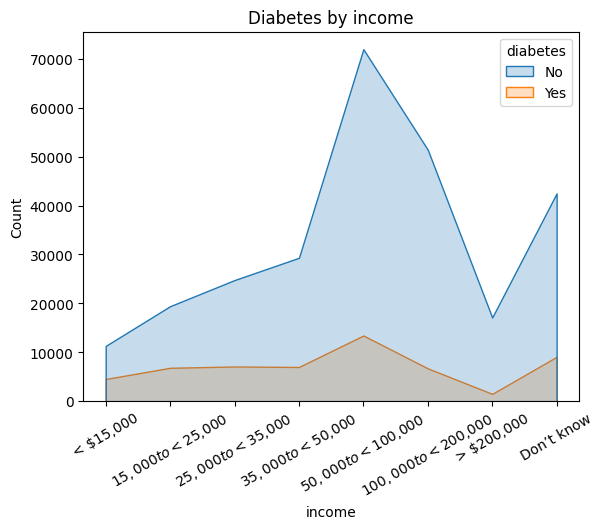

In [147]:
def BasicAnalysisGraph(ColumnName, Title, ShowCount=True, Data=df, GroupBy='diabetes', SortOrder=None):
    #Get number of bins, if under 20 use the exact size.
    bins = len(df[ColumnName].unique())
    if (bins > 20):
        bins = 20
        
    if(ShowCount):
        display(pd.DataFrame(Data.groupby([GroupBy,ColumnName])[GroupBy].describe()['count']))
    if(SortOrder):
        ax = sns.histplot(
            df[[GroupBy,ColumnName]].sort_values(by=ColumnName, key=lambda column: column.map(lambda e: SortOrder.index(e))), 
            x=ColumnName, hue=GroupBy, element='poly', bins=bins)
    else:
        ax = sns.histplot(Data, x=ColumnName, hue=GroupBy, element='poly', bins=bins)
    
    ax.set(title=f'{GroupBy.title()} by {Title}')    
    ax.tick_params(axis='x', rotation=30)
    

,,count
diabetes,diabetes,
No,No,267809
Yes,Yes,56130


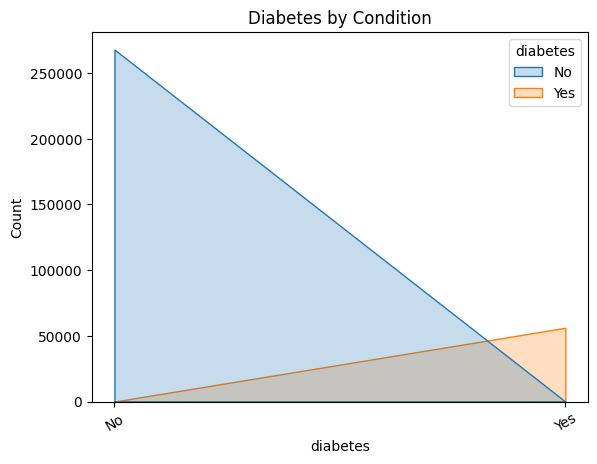

In [148]:
BasicAnalysisGraph('diabetes','Condition')

count
diabetes bmi              
No       Normal      85887
         Obese       80316
         Overweight  96689
         Under        4917
Yes      Normal       8367
         Obese       29824
         Overweight  17526
         Under         413

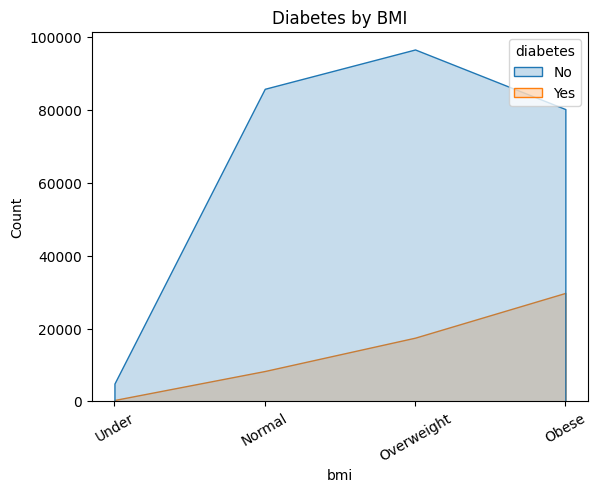

In [149]:
BasicAnalysisGraph('bmi','BMI', SortOrder=bmi_sort)

count
diabetes smoker         
No       Current   14558
         Former     8566
         No       162734
         Some      81951
Yes      Current    4144
         Former     2931
         No        30102
         Some      18953

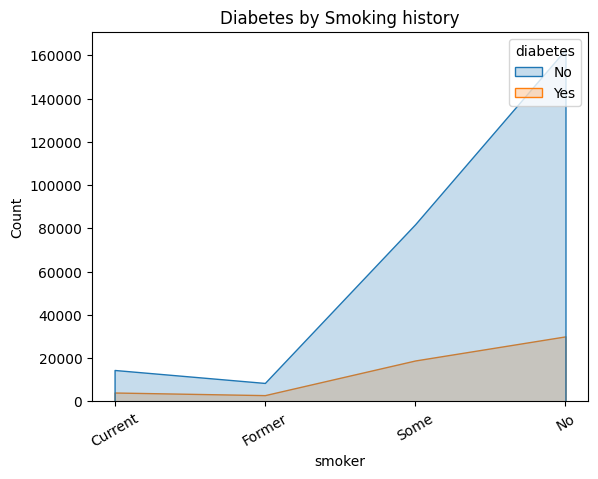

In [150]:
BasicAnalysisGraph('smoker','Smoking history', SortOrder=smoker_sort)

count
diabetes stroke         
No       No       258118
         Refused       7
         Unsure      504
         Yes        9180
Yes      No        50885
         Refused       5
         Unsure      193
         Yes        5047

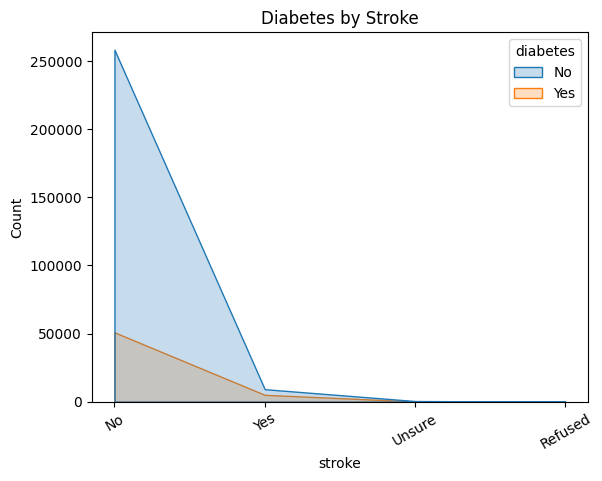

In [151]:
BasicAnalysisGraph('stroke','Stroke', stroke_sort)

count
diabetes gender        
No       Female  194920
         Male    173802
Yes      Female   40499
         Male     34824

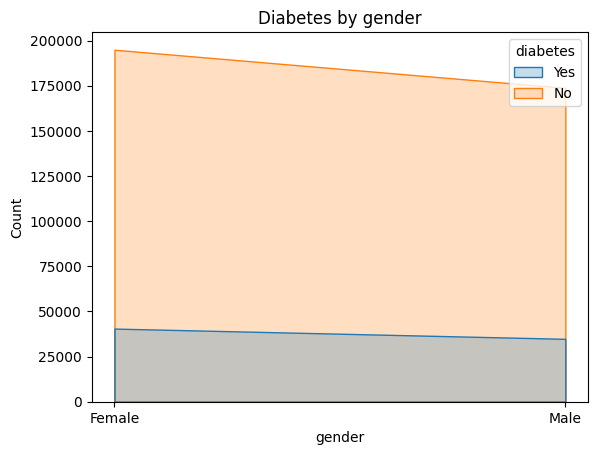

In [100]:
BasicAnalysisGraph('gender','gender')

count
diabetes heart_attack        
No       No            255768
         Refused            7
         Unsure           173
         Yes            11861
Yes      No             48657
         Refused            4
         Unsure           116
         Yes             7353

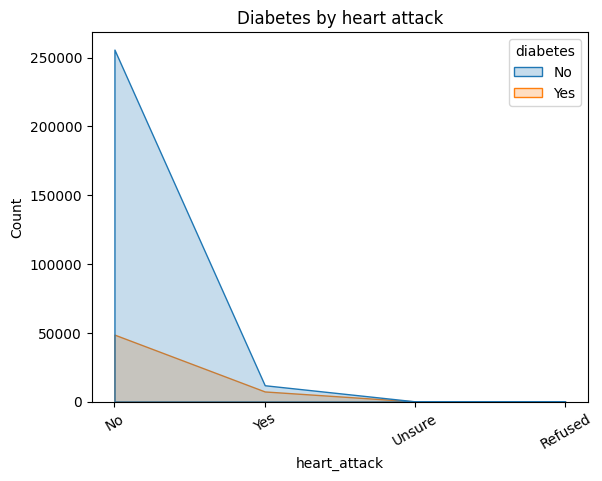

In [152]:
BasicAnalysisGraph('heart_attack','heart attack', heart_attack_sort)

count
diabetes age               
No       18 to 24     17405
         25 to 29     14109
         30 to 34     16315
         35 to 39     18408
         40 to 44     19153
         45 to 49     17795
         50 to 54     20652
         55 to 59     22023
         60 to 64     26374
         65 to 69     27757
         70 to 74     25147
         75 to 79     18567
         80 or older  21265
         Don’t know    2839
Yes      18 to 24       465
         25 to 29       575
         30 to 34       977
         35 to 39      1561
         40 to 44      2195
         45 to 49      2764
         50 to 54      4136
         55 to 59      5542
         60 to 64      7352
         65 to 69      8622
         70 to 74      8746
         75 to 79      6652
         80 or older   6057
         Don’t know     486

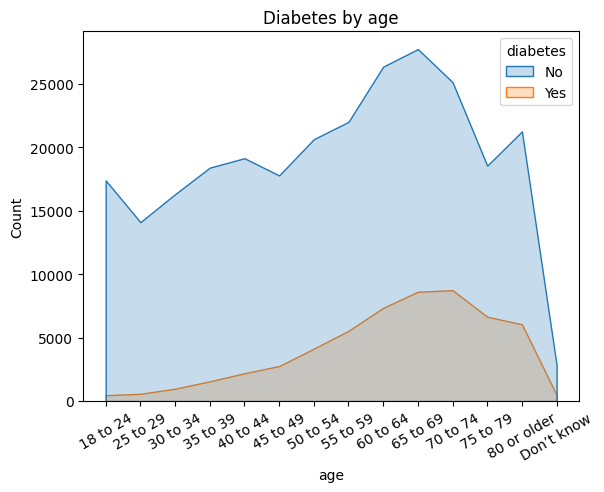

In [154]:
BasicAnalysisGraph('age','age', SortOrder=age_sort)

count
diabetes income                       
No       $100,000 to < $200,000  51421
         $15,000 to < $25,000    19421
         $25,000 to < $35,000    24764
         $35,000 to < $50,000    29321
         $50,000 to < $100,000   71982
         < $15,000               11300
         > $200,000              17112
         Don’t know              42488
Yes      $100,000 to < $200,000   6708
         $15,000 to < $25,000     6824
         $25,000 to < $35,000     7092
         $35,000 to < $50,000     6992
         $50,000 to < $100,000   13425
         < $15,000                4532
         > $200,000               1491
         Don’t know               9066

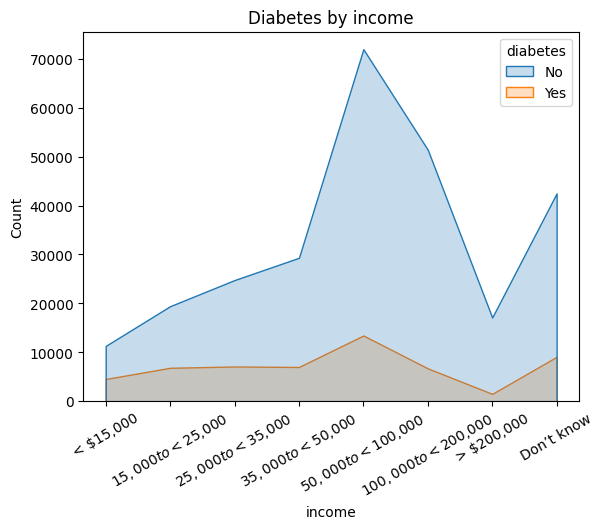

In [155]:
BasicAnalysisGraph('income', 'income', SortOrder=income_sort)

### Partial surveys 
Partial surveys occurred when data collection stopped for any reason.  This can leave holes in the data and create unnatural biases<br />
<br />
Partial surveys were dropped, then the completed_survey was dropped

In [101]:
# Drop incomplete surveys
df.drop(df[df.completed_survey == 'Partial'].index, inplace=True)

#Drop the completed_survey column
df.drop(["completed_survey"], axis=1, inplace=True)

Finally remove any null data that is truly missing.

In [102]:

#data with nulls remaining
print(f"Nulls remaining {df.isnull().sum().sum()}")

#remove nulls
df.dropna(inplace=True)

#Validate
print(f"Nulls remaining {df.isnull().sum().sum()}")

Nulls remaining 29504
Nulls remaining 0


# After data cleanup

We started with 24 features and 215 unique values, and have reduced to 23 features and 141 unique values.

In [103]:
current_state()

Features: 23
Unique values: 141


,Not Null,Null,Unique,Data Type
diabetes,323939,0,2,object
bmi,323939,0,4,object
smoker,323939,0,4,object
stroke,323939,0,4,object
heart_attack,323939,0,4,object
angina_or_chd,323939,0,4,object
chd_mi,323939,0,2,object
asthma,323939,0,4,object
physical_activity,323939,0,3,object
heavy_drinking,323939,0,3,object


get_data_for_report can convert a subset of the data to the categorical values.
Pass in the columns and it returns a dataframe with value.

column_order is used to retrieve the label data and label sort for a particular category.  This is used in the graphs.

# Basic exploration

Heart related independent variables [chd_mi, heart_attack, agina_or_chd] had strong positive correlation with each other.  agina_or_chd was within 0.02 of chd_mi and heart_attack and would be good candidates for merging.


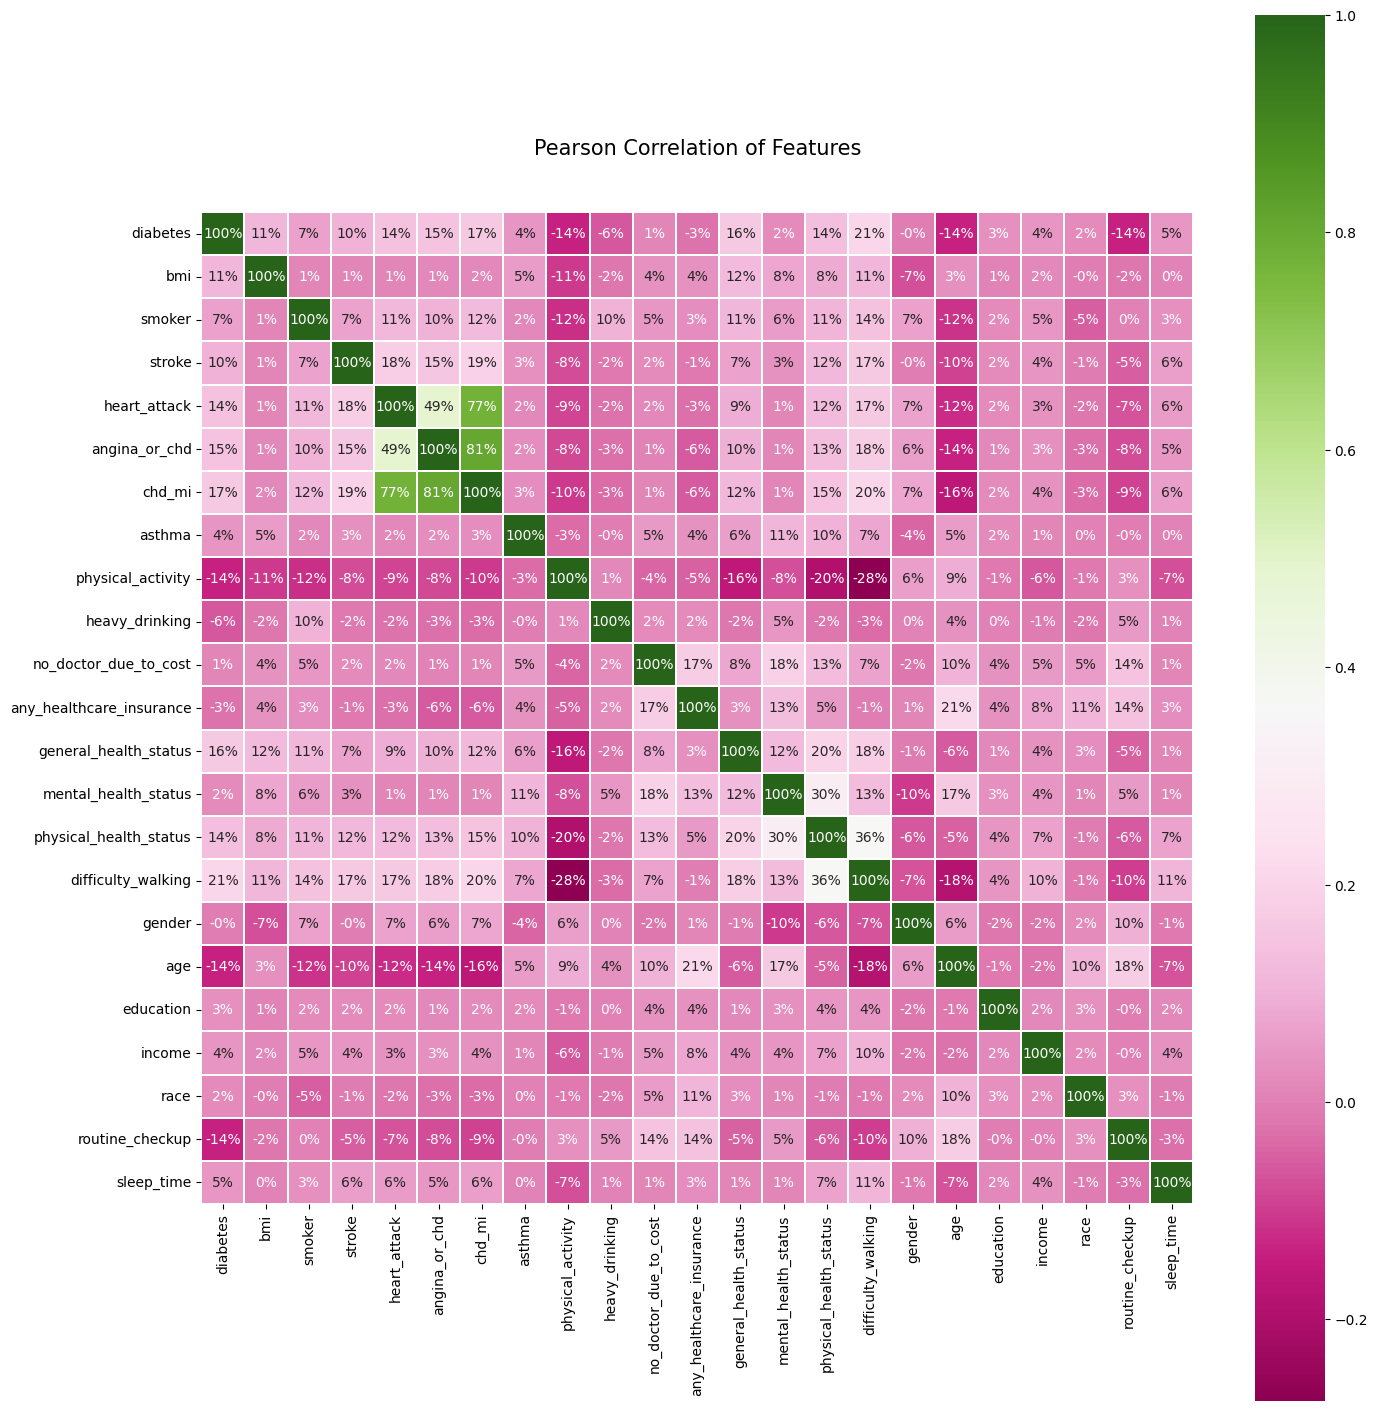

In [46]:
def show_heatmap(df):
    heat_df = df.copy()
    
    for cat_column_name in heat_df.select_dtypes(include=['category']).columns:
        heat_df[cat_column_name] = heat_df[cat_column_name].astype(str)
    
    #Enumerate the string data
    for object_column_name in heat_df.select_dtypes(include=['object']).columns:
        heat_df[object_column_name] = pd.factorize(heat_df[object_column_name])[0]

    colormap = plt.cm.RdBu
    plt.figure(figsize=(16,18))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    corrs = heat_df.astype(float).corr()
    sns.heatmap(corrs,linewidths=0.1,vmax=1.0, 
                square=True, cmap="PiYG", linecolor='white', annot=True, fmt=".0%")
    return corrs

corrs = show_heatmap(df)

heart_attack and angina_or_chd have high correlation with each other and similar correlation to diabetes.
Lets combine them into a heart related

In [47]:
# Merge heart attack, chd/mi and angina/chd into a heart related feature due similar correlation between each other.
df.loc[(df.heart_attack == 'Yes'),'heart_related'] = 'Yes'
df.loc[(df.angina_or_chd == 'Yes'),'heart_related'] = 'Yes'
df.heart_related.fillna('No', inplace=True)
df.drop(['heart_attack','angina_or_chd'], axis=1, inplace=True)

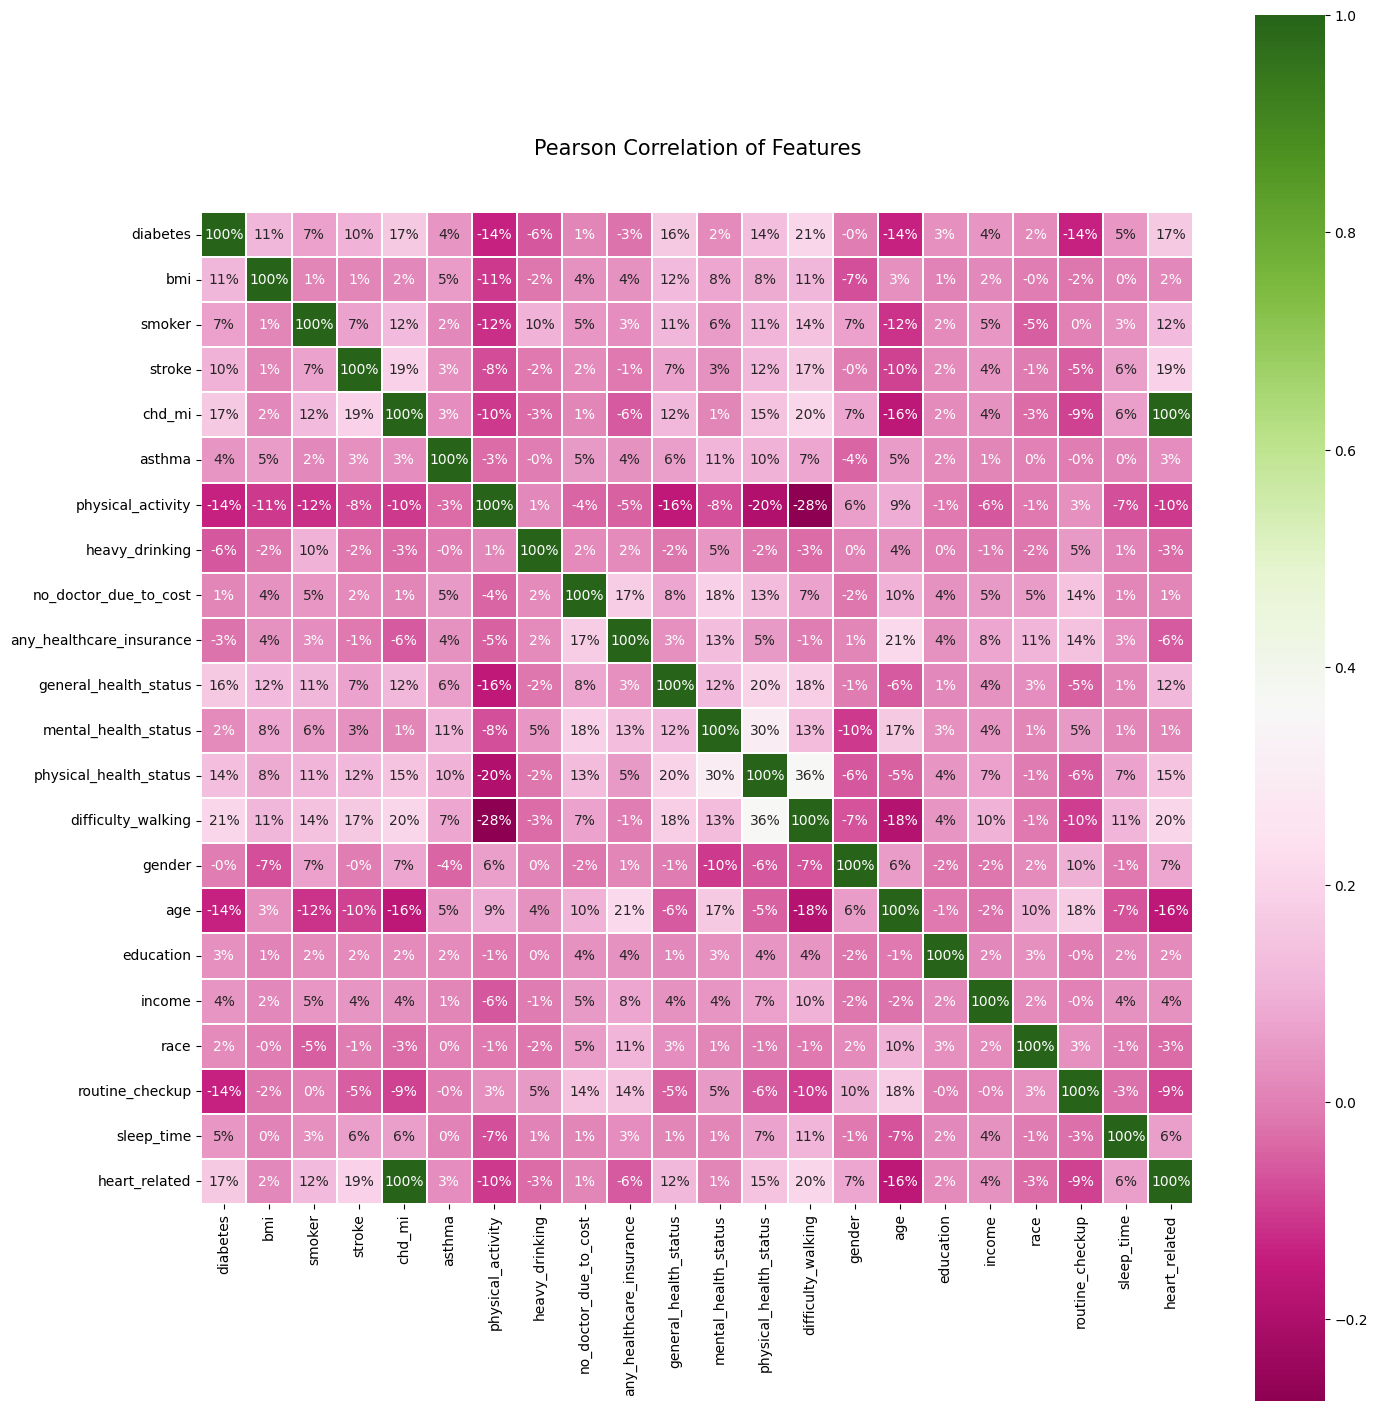

In [48]:
corrs = show_heatmap(df)

After the merge of Angia and heart attack, chd_mi has a 100% correlation.  Merging those into heart_related

In [49]:
# Merge heart attack, chd/mi and angina/chd into a heart related feature due similar correlation between each other.
df.loc[(df.chd_mi == 'Yes'),'heart_related'] = 'Yes'
df.drop(['chd_mi'], axis=1, inplace=True)

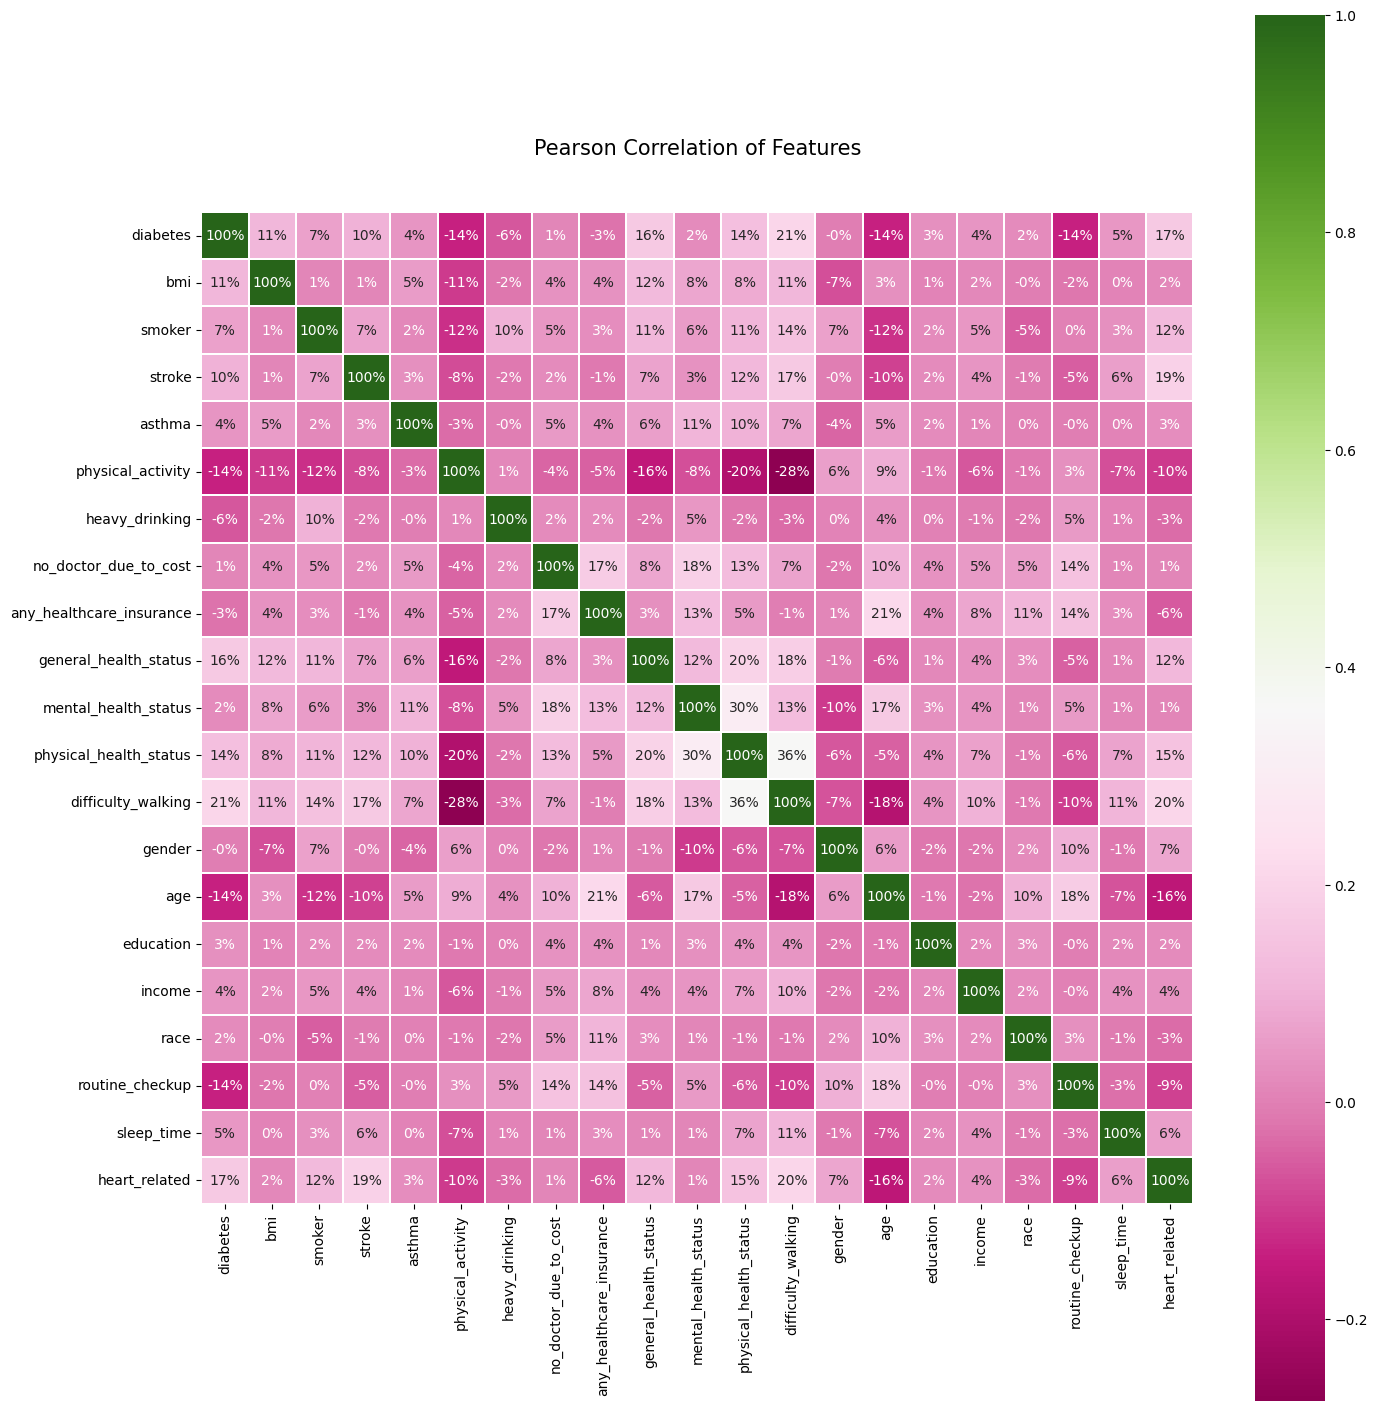

In [50]:
corrs = show_heatmap(df)

# Correlation to diabetes

**Positive correlation**
The highest positively correlated independent variables are general_health_status, difficulty walking, age and BMI. The set of 3 heart related independent variables had a similar correlation to diabetes and each other and would be a good candidate for simplification. 

**Negative correlation**
As expected as diabetes increases, physical activity decreases.  However education level and income also decrease which may indicate that diabetes may reduce the ability for a person to earn a living.

In [51]:
def factorize(df=df, ignore_column_names=None):
    pg_df = df.copy()
    if (ignore_column_names != None):
        pg_df = pg_df.drop(ignore_column_names, axis=1)
    
    for object_column_name in pg_df.select_dtypes(include=['object']).columns:
        pg_df[object_column_name] = pd.factorize(pg_df[object_column_name])[0]
        
    return pg_df
    

In [52]:
def show_pair_grid(df, ignore_column_names=None):

    pg_df = factorize(df,ignore_column_names)
        
    g=sns.PairGrid(  pg_df, hue="diabetes" )
    g.map(sns.scatterplot)
    
#pg_df = show_pair_grid(df,ignore_column_names=['PassengerId','Parch'])
#pg_df =  show_pair_grid(df)

In [53]:
current_state()

Features: 21
Unique values: 133


,Not Null,Null,Unique,Data Type
diabetes,323939,0,2,object
bmi,323939,0,4,object
smoker,323939,0,4,object
stroke,323939,0,4,object
asthma,323939,0,4,object
physical_activity,323939,0,3,object
heavy_drinking,323939,0,3,object
no_doctor_due_to_cost,323939,0,4,object
any_healthcare_insurance,323939,0,13,object
general_health_status,323939,0,7,object


Most of the data is already categorized, but did pair grid with some of the higher number of values.

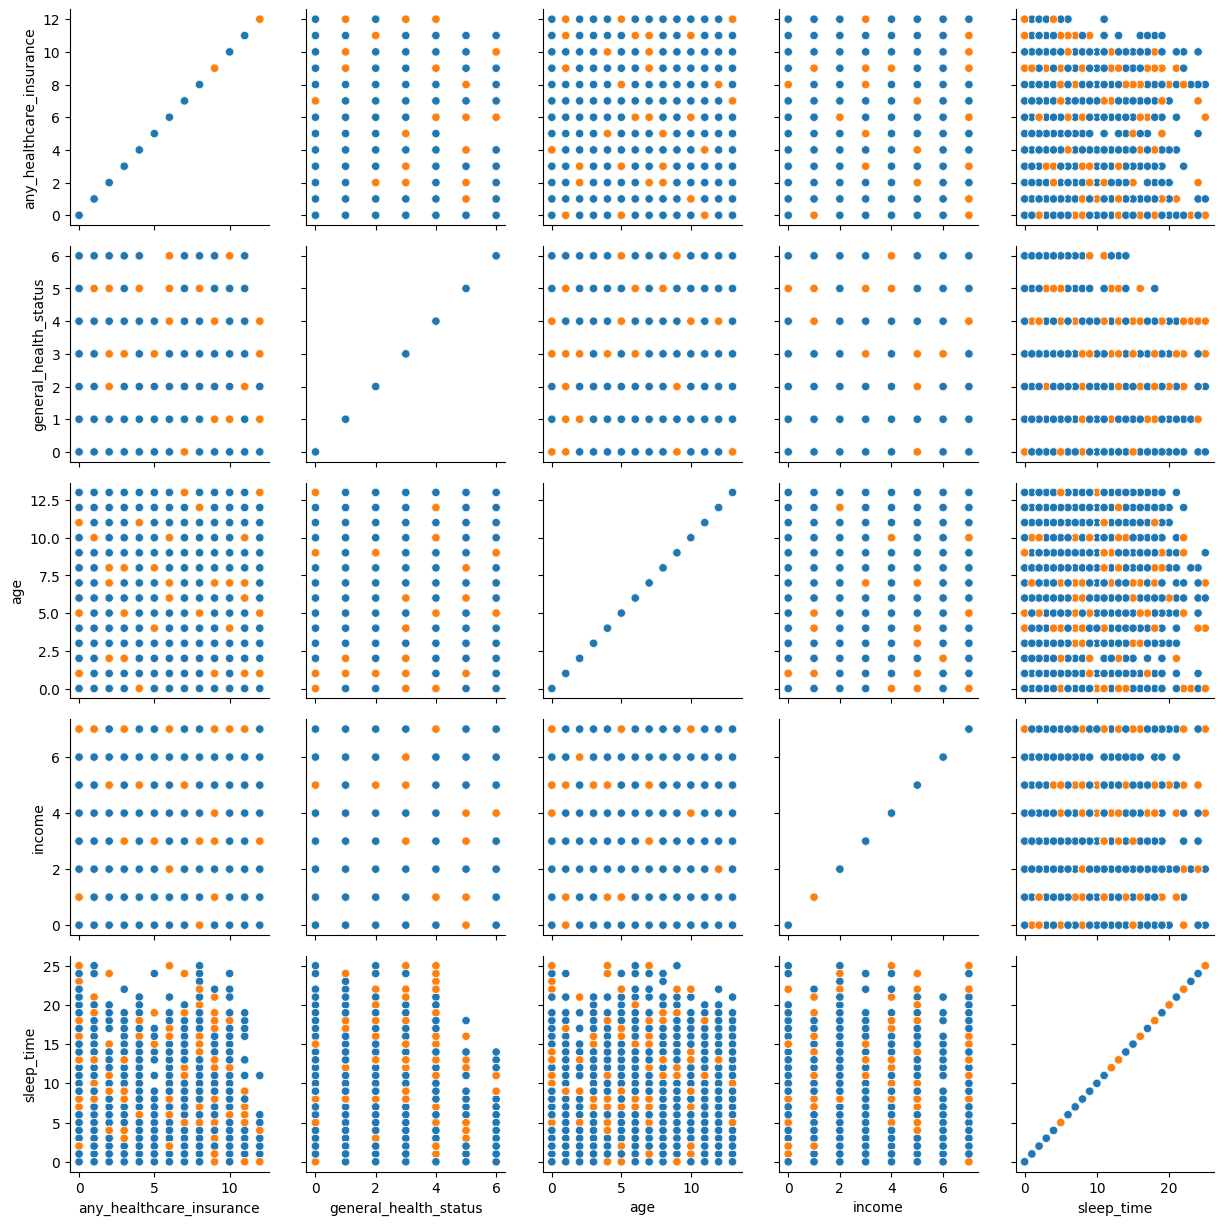

In [54]:
#Pair grid on Unique with highest counts.
pg_df = df[['diabetes','any_healthcare_insurance','general_health_status','age','income','sleep_time']]
show_pair_grid(pg_df)

In [61]:
df.head(3)

,diabetes,bmi,smoker,stroke,asthma,physical_activity,heavy_drinking,no_doctor_due_to_cost,any_healthcare_insurance,general_health_status,...,physical_health_status,difficulty_walking,gender,age,education,income,race,routine_checkup,sleep_time,heart_related
1,No,Overweight,No,No,Never,No,Yes,No,Medicare,Excellent,...,0,No,Female,80 or older,High School,"$25,000 to < $35,000",White,Never,6.0,No
2,No,Overweight,No,No,Never,Yes,Yes,No,Employer,Very good,...,1-13,No,Female,55 to 59,Graduated College,"$100,000 to < $200,000",White,Within Last Year,5.0,No
3,No,Normal,Some,No,Current,Yes,Yes,No,Refused,Excellent,...,0,No,Female,Don’t know,High School,Don’t know,White,Within Last Year,7.0,No


Save cleaned categorized data

In [62]:
df.to_csv('diabetes_categories.csv', index=False)